<a href="https://colab.research.google.com/github/Nigel-Anthony/Exploratory-Data-Analysis/blob/main/ML_Finance_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithmic Decision-Making in Mortgage Origination: A Study on Racial Bias

---



The following rsearch is based on  Munnell, Tootell, Browne, and McEneaney (1996) (https://www.depauw.edu/learn/stata/Workshop/Munnell.pdf).

## 1. Importing required libraries

Pandas: Pandas is a powerful Python library used for data manipulation and analysis. It provides data structures and functions for efficiently handling structured data, such as importing/exporting data from various file formats, cleaning, transforming, and aggregating data, and performing statistical operations.

NumPy: NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. NumPy is widely used in fields such as machine learning, data analysis, and scientific research.

Seaborn: Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn simplifies the process of creating complex visualizations by providing functions for easily styling plots and incorporating statistical estimation.

Matplotlib: Matplotlib is a comprehensive library for creating static, interactive, and animated visualizations in Python. It offers a wide range of plotting functions and customization options, allowing users to create publication-quality figures for various purposes, including data exploration, presentation, and scientific publications.

Plotly: Plotly is a Python library for creating interactive and web-based visualizations. It offers a rich ecosystem of tools for building interactive plots, dashboards, and applications. Plotly supports a wide range of chart types and allows for easy sharing and collaboration on visualizations through its online platform.

Scikit-learn (Sklearn): Scikit-learn is a versatile machine learning library for Python. It provides simple and efficient tools for data mining and data analysis, built on top of other scientific computing libraries such as NumPy, SciPy, and Matplotlib. Scikit-learn offers a wide range of supervised and unsupervised learning algorithms, as well as tools for model selection, evaluation, and preprocessing.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 2. Importing and Reading the dataset

In [ ]:
hmda = pd.read_csv('Hmda.csv')

## 2.1 Description and Summary of the data

dir: debt payments to total income ratio;

hir: housing expenses to income ratio;

lvr: ratio of size of loan to assessed value of property;

ccs: consumer credit score;

mcs: mortgage credit score;

pbcr: public bad credit record;

dmi: denied mortgage insurance;

self: self employed;

single: applicant is single;

uria: 1989 Massachusetts unemployment rate applicant's industry;

condominiom: condominium;

black: race of applicant black;

deny: mortgage application denied;

In [ ]:
hmda.describe()

,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


In [ ]:
hmda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2380 non-null   object 
 6   dmi          2381 non-null   object 
 7   self         2380 non-null   object 
 8   single       2381 non-null   object 
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   object 
 12  deny         2381 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 241.9+ KB


## 2.2 Checking for null values

In [ ]:
hmda.isnull().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [ ]:
#Extracting the null values

null_value = hmda[hmda.isnull().any(axis=1)]
null_value

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


## 2.3 Dropping the row that contains null value since it might corrupt the datset and cause hinderance while training and testing machine learning models.

In [ ]:
# Dropping the row which contained the null value

hmda = hmda.dropna(axis=0)
hmda

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,0.310,0.250,0.800000,1.0,1.0,no,no,yes,no,3.2,0,no,no
2376,0.300,0.300,0.777049,1.0,2.0,no,no,no,yes,3.2,1,no,no
2377,0.260,0.200,0.526761,2.0,1.0,no,no,no,no,3.1,0,no,no
2378,0.320,0.260,0.753846,6.0,1.0,yes,no,no,yes,3.1,1,yes,yes


# 3. Exploratory Data Anlaysis and Preliminary Analysis of each variable

In [ ]:
# Checking the percentage of denied mortgages for the entire dataset

hmda["deny"].value_counts()

no     2095
yes     285
Name: deny, dtype: int64

In [ ]:
# Checking the percentage of denied mortgages for the white group

white = hmda[hmda["black"] == "no"]
white["deny"].value_counts()

no     1852
yes     189
Name: deny, dtype: int64

In [ ]:
# Checking the percentage of denied mortgages for the minority group

minority = hmda[hmda["black"] == "yes"]
minority["deny"].value_counts()

no     243
yes     96
Name: deny, dtype: int64

From the above analysis we can conclude that:

Percentage of mortgages denied

Black = 28.31%

White = 9.26%

Combined = 11.97%




The initial analysis suggests that race may have influenced mortgage approval outcomes, as evidenced by a significantly higher denial rate among people of color compared to the non-colored group, as well as the overall population. However, additional in-depth analysis is necessary to ascertain the true impact of race on mortgage approval decisions.

## 3.1 Based on DIR

DIR <= 0.33081356721134453 : 92.06% not denied mortgages, 7.94% denied mortgages


DIR >= 0.33081356721134453 : 83.95% not denied mortgages, 16.05% denied mortgages

In [ ]:
average_dir = hmda["dir"].mean()
average_dir

0.33081356721134453

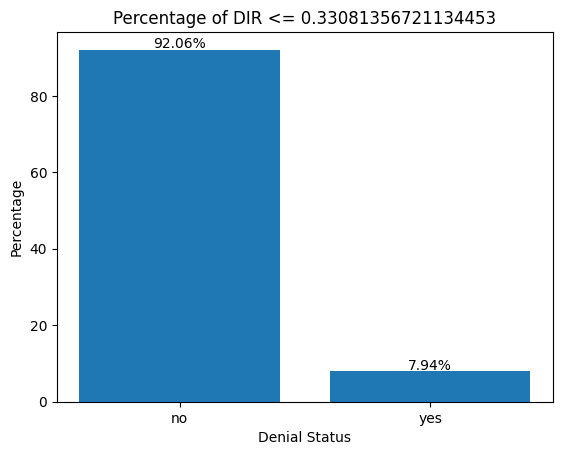

In [ ]:

dir = hmda[hmda["dir"]  <=0.33081356721134453]


dir_deny_counts = dir["deny"].value_counts()


deny_percentages = dir_deny_counts / dir_deny_counts.sum() * 100


plt.bar(deny_percentages.index, deny_percentages.values)


for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')


plt.title("Percentage of DIR <= 0.33081356721134453")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")


plt.show()



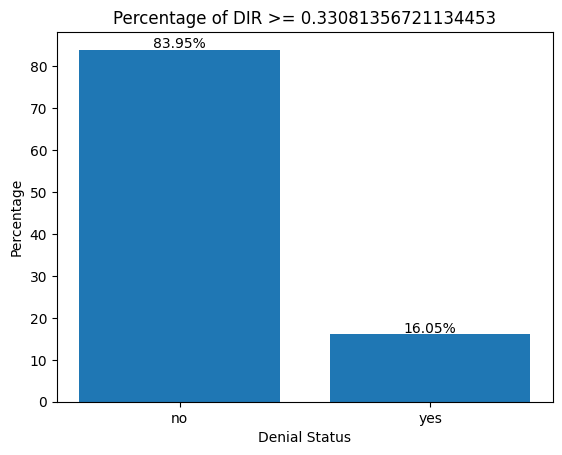

In [ ]:

dir = hmda[hmda["dir"]  >=0.33081356721134453]


dir_deny_counts = dir["deny"].value_counts()


deny_percentages = dir_deny_counts / dir_deny_counts.sum() * 100


plt.bar(deny_percentages.index, deny_percentages.values)


for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')


plt.title("Percentage of DIR >= 0.33081356721134453")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")


plt.show()



## 3.2 Based on HIR

HIR <= 0.25534612177478994 : 90.31% not denied mortgages, 9.69% denied mortgages

HIR >= 0.25534612177478994 : 86.15% not denied mortgages, 13.85% denied mortgages

In [ ]:
average_dir = hmda["hir"].mean()
average_dir

0.25534612177478994

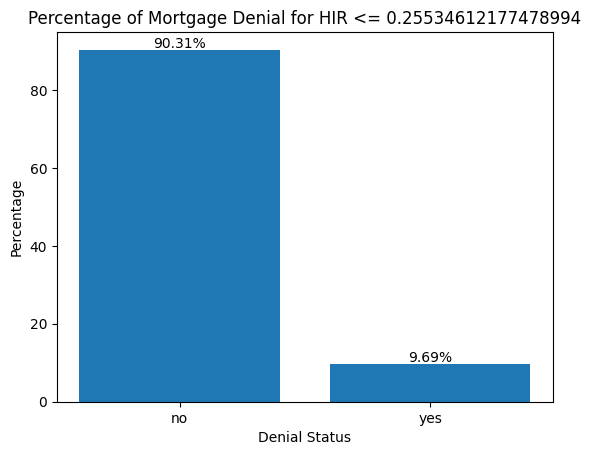

In [ ]:
# Filter the data for Homeownership Ratio (HIR) less than or equal to 0.25534612177478994
hir = hmda[hmda["hir"] <= 0.25534612177478994]

# Get value counts of the 'deny' column for the filtered data
hir_deny_counts = hir["deny"].value_counts()

# Calculate percentages
deny_percentages = hir_deny_counts / hir_deny_counts.sum() * 100

# Plotting the graph
plt.bar(deny_percentages.index, deny_percentages.values)

# Adding percentage labels to the bars
for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

# Adding title and labels to the plot
plt.title("Percentage of Mortgage Denial for HIR <= 0.25534612177478994")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")

# Displaying the plot
plt.show()


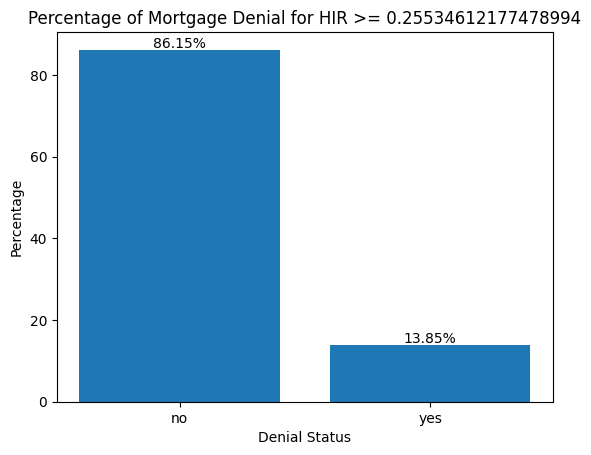

In [ ]:
# Filter the data for Homeownership Ratio (HIR) greater than or equal to 0.25534612177478994
hir = hmda[hmda["hir"] >= 0.25534612177478994]

# Get value counts of the 'deny' column for the filtered data
hir_deny_counts = hir["deny"].value_counts()

# Calculate percentages
deny_percentages = hir_deny_counts / hir_deny_counts.sum() * 100

# Plotting the graph
plt.bar(deny_percentages.index, deny_percentages.values)

# Adding percentage labels to the bars
for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

# Adding title and labels to the plot
plt.title("Percentage of Mortgage Denial for HIR >= 0.25534612177478994")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")

# Displaying the plot
plt.show()


## 3.3 Based on LVR

LVR <= 0.7377759056382353 : 93.37% not denied mortgages, 6.63% denied mortgages

LVR >= 0.7377759056382353 : 84.66% not denied mortgages, 15.34% denied mortgages

In [ ]:
average_dir = hmda["lvr"].mean()
average_dir

0.7377759056382353

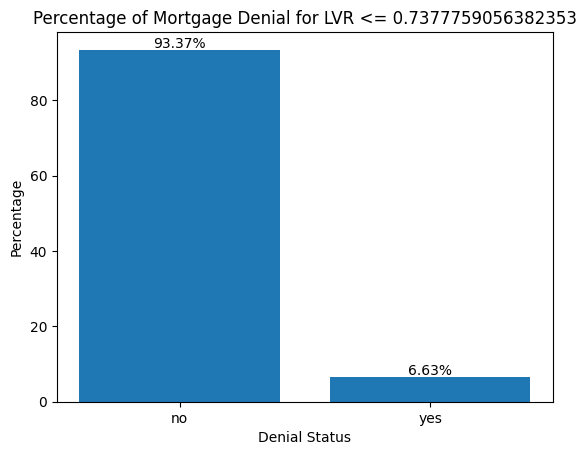

In [ ]:
# Filter the data for Loan-to-Value Ratio (LVR) less than or equal to 0.7377759056382353
lvr = hmda[hmda["lvr"] <= 0.7377759056382353]

# Get value counts of the 'deny' column for the filtered data
lvr_deny_counts = lvr["deny"].value_counts()

# Calculate percentages
deny_percentages = lvr_deny_counts / lvr_deny_counts.sum() * 100

# Plotting the graph
plt.bar(deny_percentages.index, deny_percentages.values)

# Adding percentage labels to the bars
for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

# Adding title and labels to the plot
plt.title("Percentage of Mortgage Denial for LVR <= 0.7377759056382353")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")

# Displaying the plot
plt.show()


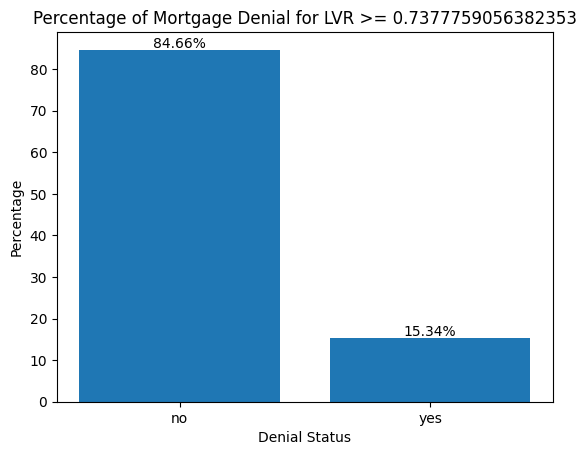

In [ ]:
# Filter the data for Loan-to-Value Ratio (LVR) greater than or equal to 0.7377759056382353
lvr = hmda[hmda["lvr"] >= 0.7377759056382353]

# Get value counts of the 'deny' column for the filtered data
lvr_deny_counts = lvr["deny"].value_counts()

# Calculate percentages
deny_percentages = lvr_deny_counts / lvr_deny_counts.sum() * 100

# Plotting the graph
plt.bar(deny_percentages.index, deny_percentages.values)

# Adding percentage labels to the bars
for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

# Adding title and labels to the plot
plt.title("Percentage of Mortgage Denial for LVR >= 0.7377759056382353")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")

# Displaying the plot
plt.show()


## 3.4 Based on CCS
=1 : 6.21% denied, 93.79% approved, 1353 total

=2 : 11.56% denied, 88.44% approved, 441 total

=3 : 18.25% denied, 81.75% approved, 126 total

=4 : 22.08% denied, 77.92% approved, 77 total

=5 : 23.08% denied, 76.92% approved, 182 total

=6 : 66.17% denied, 33.83% approved, 201 total


Text(0, 0.5, 'number')

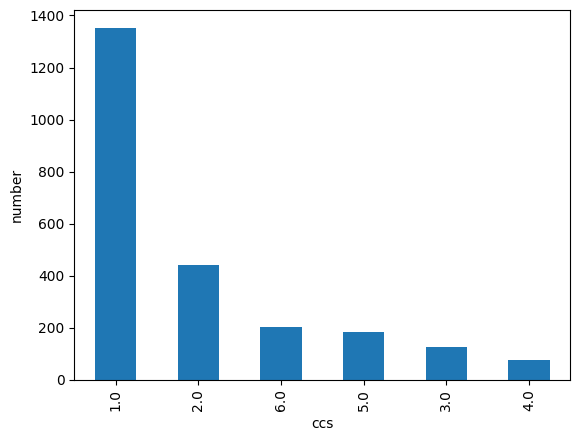

In [ ]:
plt = hmda.ccs.value_counts().plot(kind= 'bar')
plt.set_xlabel('ccs')
plt.set_ylabel('number')

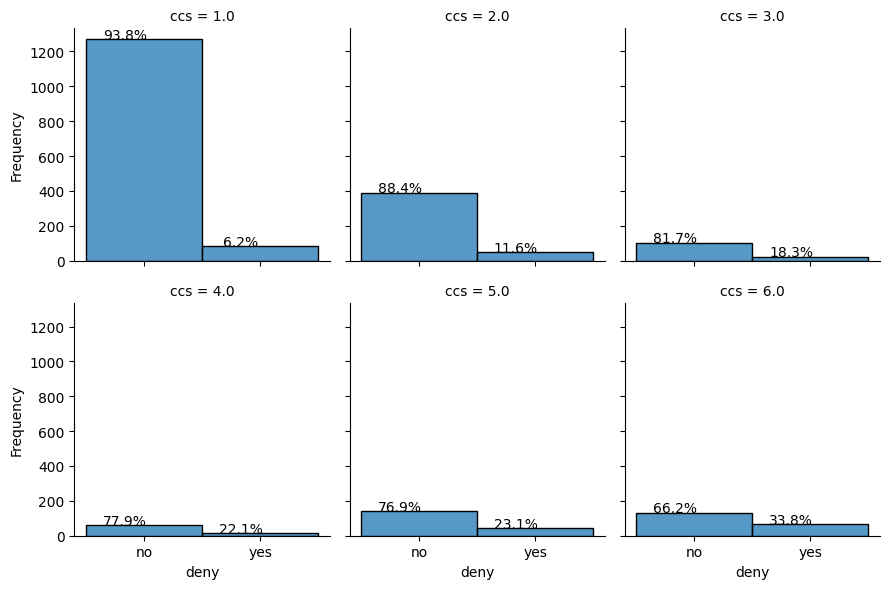

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define a function to annotate each histogram with percentages
def annotate_perc(x, **kwargs):
    total = len(x)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 3., height + 1.1, f'{height / total:.1%}', ha="center")

# Plotting the graph with more space between subplots
g = sns.FacetGrid(hmda, col="ccs", col_wrap=3, height=3, aspect=1)
g.map_dataframe(sns.histplot, x="deny", stat="count")
g.set_axis_labels("Mortgage Deny Counts", "Frequency")

# Annotate the histograms with percentages
g.map(annotate_perc, "deny")

plt.show()


## 3.5 Based on MCS

=1 : 7.10% denied, 92.90% approved, 747 total

=2 : 13.88% denied, 86.12% approved, 1571 total

=3 : 21.95% denied, 78.05% approved, 41 total

=4 : 23.81% denied, 76.19% approved, 21 total

Text(0, 0.5, 'number')

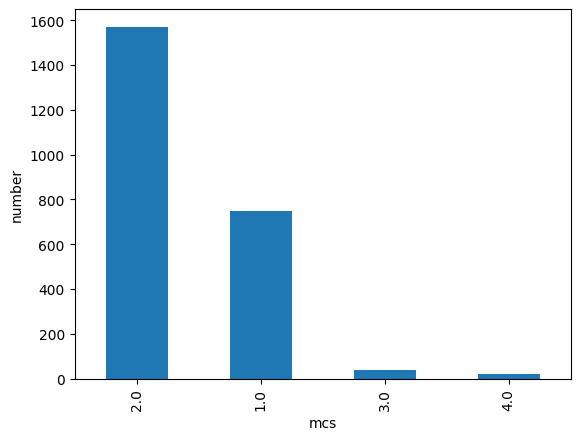

In [ ]:
plt = hmda.mcs.value_counts().plot(kind= 'bar')
plt.set_xlabel('mcs')
plt.set_ylabel('number')

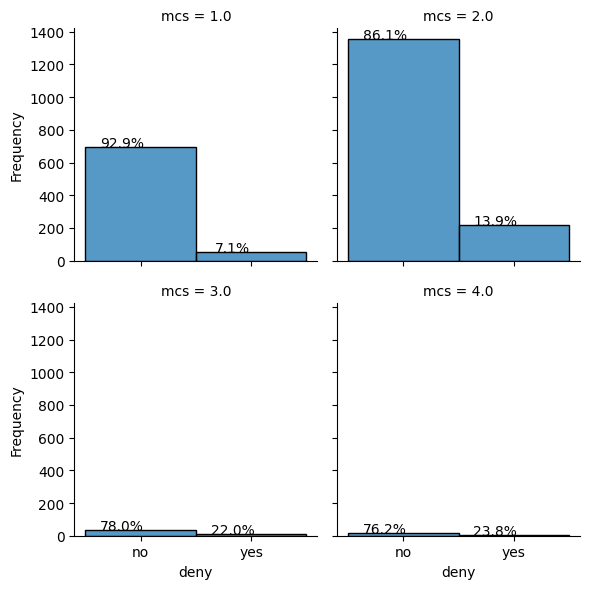

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define a function to annotate each histogram with percentages
def annotate_perc(x, **kwargs):
    total = len(x)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 3., height + 1.1, f'{height / total:.1%}', ha="center")

# Plotting the graph with more space between subplots
g = sns.FacetGrid(hmda, col="mcs", col_wrap=2, height=3, aspect=1)
g.map_dataframe(sns.histplot, x="deny", stat="count")
g.set_axis_labels("Mortgage Deny Counts", "Frequency")

# Annotate the histograms with percentages
g.map(annotate_perc, "deny")

plt.show()


## 3.6 Based on PBCR

2205 no, 175 yes

PBCR=no : 90.52% not denied mortgage, 9.48% denied mortgage

PBCR=yes : 56.57% not denied mortgage, 43.43% denied mortgage

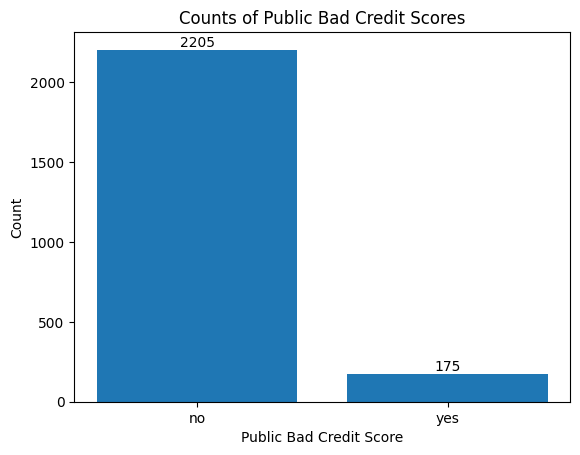

In [ ]:
# Extract unique elements of the "pbcr" column
unique_public_bad_scores = hmda["pbcr"].unique()

# Count occurrences of each pbcr
public_bad_credit_score_counts = hmda["pbcr"].value_counts()

# Plotting the bar plot
plt.bar(unique_public_bad_scores, public_bad_credit_score_counts)

# Adding labels and title
plt.xlabel('Public Bad Credit Score')
plt.ylabel('Count')
plt.title('Counts of Public Bad Credit Scores')

# Adding count labels on top of each bar
for x, y in zip(unique_public_bad_scores, public_bad_credit_score_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Show the plot
plt.show()


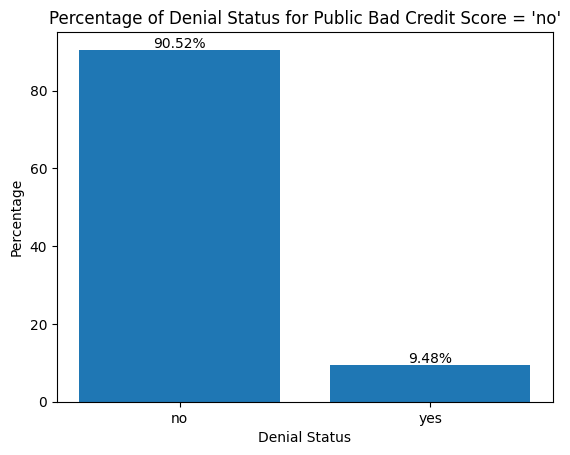

In [ ]:
# Filter data for public bad credit score equal to "no"
pbcr = hmda[hmda["pbcr"] == "no"]

# Get value counts of 'deny' column for public bad credit score "no"
pbcr_deny_counts = pbcr["deny"].value_counts()

# Calculate percentages
deny_percentages = pbcr_deny_counts / pbcr_deny_counts.sum() * 100

# Plotting the graph
plt.bar(deny_percentages.index, deny_percentages.values)

# Adding percentage labels
for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

# Adding title and labels
plt.title("Percentage of Denial Status for Public Bad Credit Score = 'no'")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")

# Display the plot
plt.show()


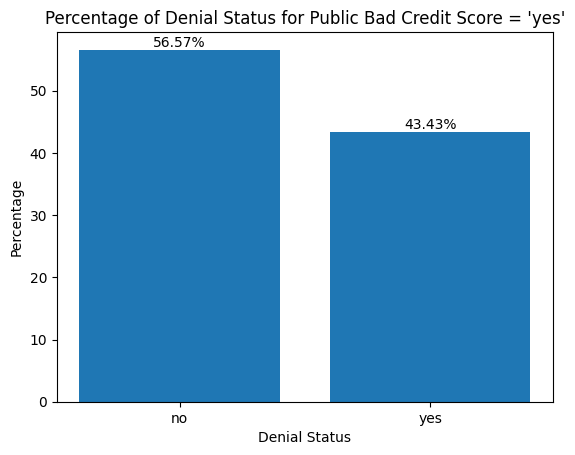

In [ ]:
# Filter data for public bad credit score equal to "yes"
pbcr = hmda[hmda["pbcr"] == "yes"]

# Get value counts of 'deny' column for public bad credit score "yes"
pbcr_deny_counts = pbcr["deny"].value_counts()

# Calculate percentages
deny_percentages = pbcr_deny_counts / pbcr_deny_counts.sum() * 100

# Plotting the graph
plt.bar(deny_percentages.index, deny_percentages.values)

# Adding percentage labels
for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

# Adding title and labels
plt.title("Percentage of Denial Status for Public Bad Credit Score = 'yes'")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")

# Display the plot
plt.show()


## 3.7 Based on DMI

2332 no, 48 yes

DMI=no : 89.67% not denied mortgage, 10.33% denied mortgage

DMI=yes : 91.67% not denied mortgage, 8.33% denied mortgage

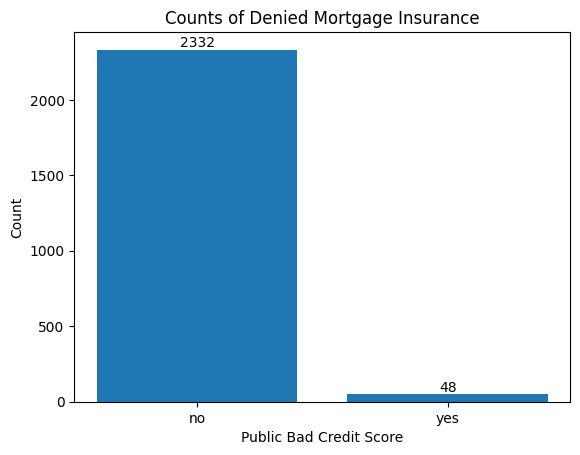

In [ ]:
# Extract unique elements of the "dmi" column
dmi = hmda["dmi"].unique()

# Count occurrences of each dmi
dmi_counts = hmda["dmi"].value_counts()

# Plotting the bar plot
plt.bar(dmi, dmi_counts)

# Adding labels and title
plt.xlabel('Public Bad Credit Score')
plt.ylabel('Count')
plt.title('Counts of Denied Mortgage Insurance')

# Adding count labels on top of each bar
for x, y in zip(dmi, dmi_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Show the plot
plt.show()


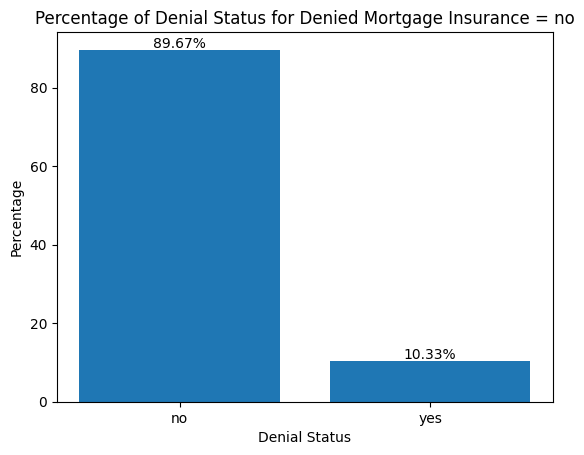

In [ ]:
# Filter data for dmi = "no"
dmi = hmda[hmda["dmi"] == "no"]

# Get value counts of 'deny' column for deny = "no"
dmi_deny_counts = dmi["deny"].value_counts()

# Calculate percentages
deny_percentages = dmi_deny_counts / dmi_deny_counts.sum() * 100

# Plotting the graph
plt.bar(deny_percentages.index, deny_percentages.values)

# Adding percentage labels
for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

# Adding title and labels
plt.title("Percentage of Denial Status for Denied Mortgage Insurance = no")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")

# Display the plot
plt.show()


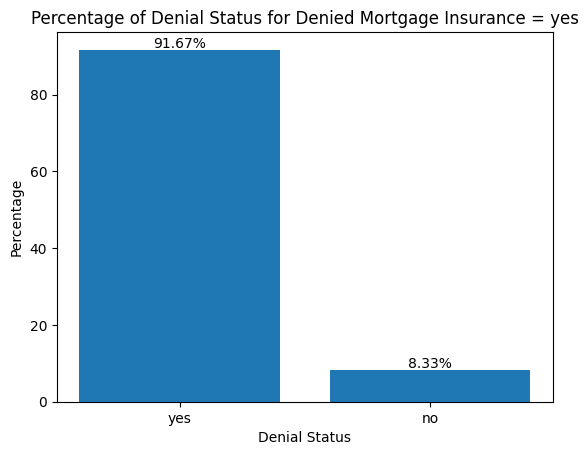

In [ ]:
# Filter data for dmi = "yes"
dmi = hmda[hmda["dmi"] == "yes"]

# Get value counts of 'deny' column for deny = "yes"
dmi_deny_counts = dmi["deny"].value_counts()

# Calculate percentages
deny_percentages = dmi_deny_counts / dmi_deny_counts.sum() * 100

# Plotting the graph
plt.bar(deny_percentages.index, deny_percentages.values)

# Adding percentage labels
for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

# Adding title and labels
plt.title("Percentage of Denial Status for Denied Mortgage Insurance = yes")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")

# Display the plot
plt.show()


## 3.8 Based on Self Employment

2103 no, 277 yes

Self Employed=no : 88.64% not denied mortgages, 11.36% denied mortgages

Self Employed=yes : 83.39% not denied mortgages, 16.61 denied mortgages


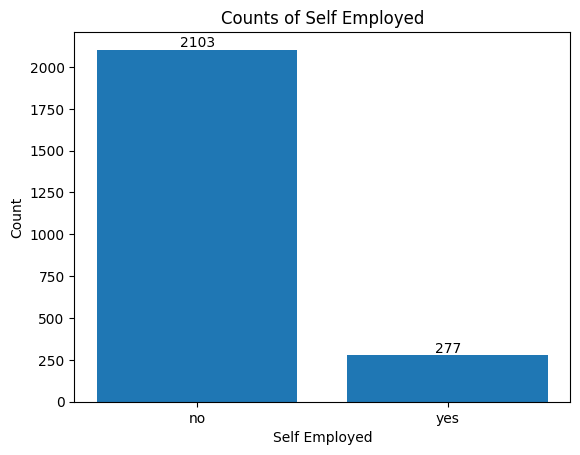

In [ ]:
# Extract unique elements of the "self" column
selfemp = hmda["self"].unique()

# Count occurrences of each
selfemp_counts = hmda["self"].value_counts()


# Plotting the bar plot
plt.bar(selfemp, selfemp_counts)

# Adding labels and title
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.title('Counts of Self Employed')

# Adding count labels on the right-hand side of each bar
for x, y in zip(selfemp, selfemp_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Show plot
plt.show()


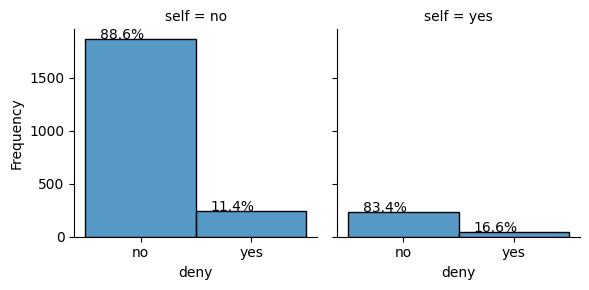

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define a function to annotate each histogram with percentages
def annotate_perc(x, **kwargs):
    total = len(x)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 3., height + 1.1, f'{height / total:.1%}', ha="center")

# Plotting the graph with more space between subplots
g = sns.FacetGrid(hmda, col="self", col_wrap=2, height=3, aspect=1)
g.map_dataframe(sns.histplot, x="deny", stat="count")
g.set_axis_labels("Mortgage Deny Counts", "Frequency")

# Annotate the histograms with percentages
g.map(annotate_perc, "deny")

plt.show()


## 3.9 Based on Marital Status

 1444 yes, 936 no

Single=no : 90.03% not denied mortgage, 9.97% denied mortgage

Single=yes : 84.94% not denied mortgage, 15.06% denied mortgage

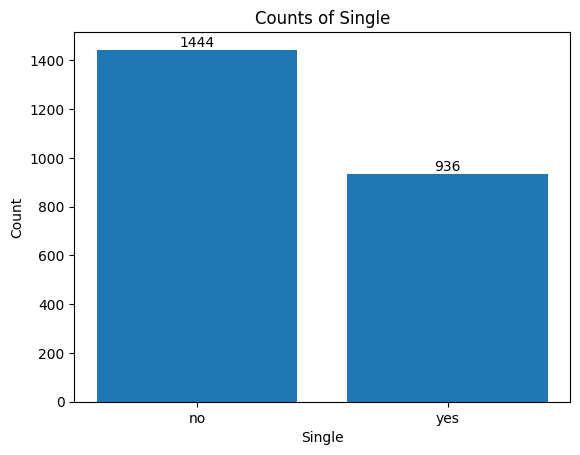

In [ ]:
# Extract unique elements of the "single" column
single = hmda["single"].unique()

# Count occurrences of each
single_counts = hmda["single"].value_counts()


# Plotting the bar plot
plt.bar(single, single_counts)

# Adding labels and title
plt.xlabel('Single')
plt.ylabel('Count')
plt.title('Counts of Single')

# Adding count labels on the right-hand side of each bar
for x, y in zip(single, single_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Show plot
plt.show()


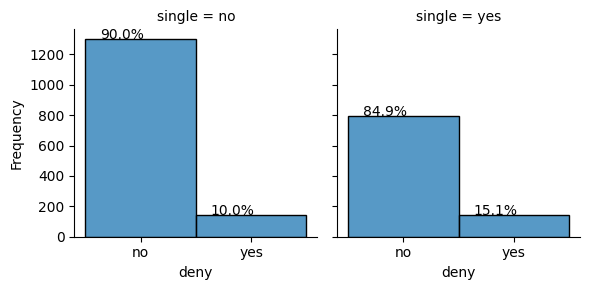

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define a function to annotate each histogram with percentages
def annotate_perc(x, **kwargs):
    total = len(x)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 3., height + 1.1, f'{height / total:.1%}', ha="center")

# Plotting the graph with more space between subplots
g = sns.FacetGrid(hmda, col="single", col_wrap=2, height=3, aspect=1)
g.map_dataframe(sns.histplot, x="deny", stat="count")
g.set_axis_labels("Mortgage Deny Counts", "Frequency")

# Annotate the histograms with percentages
g.map(annotate_perc, "deny")

plt.show()


## 3.10 Based on URIA

uria <= 3.774495848545798 : 89% not denied mortgages, 11% denied mortgages

uria >= 3.774495848545798 : 85.63% not denied mortgages, 14.37% denied mortagages

In [ ]:
average_uria = hmda["uria"].mean()
average_uria

3.774495848545798

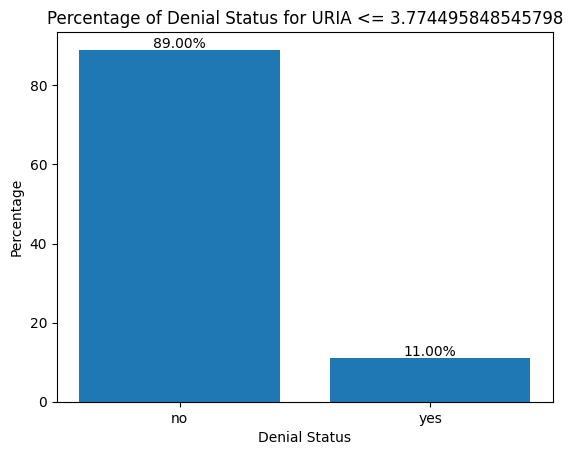

In [ ]:
# Filter data for URIA less than or equal to 3.774495848545798
uria = hmda[hmda["uria"] <= 3.774495848545798]

# Get value counts of 'deny' column for URIA less than or equal to 3.774495848545798
uria_deny_counts = uria["deny"].value_counts()

# Calculate percentages
deny_percentages = uria_deny_counts / uria_deny_counts.sum() * 100

# Plotting the graph
plt.bar(deny_percentages.index, deny_percentages.values)

# Adding percentage labels
for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

# Adding title and labels
plt.title("Percentage of Denial Status for URIA <= 3.774495848545798")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")

# Display the plot
plt.show()


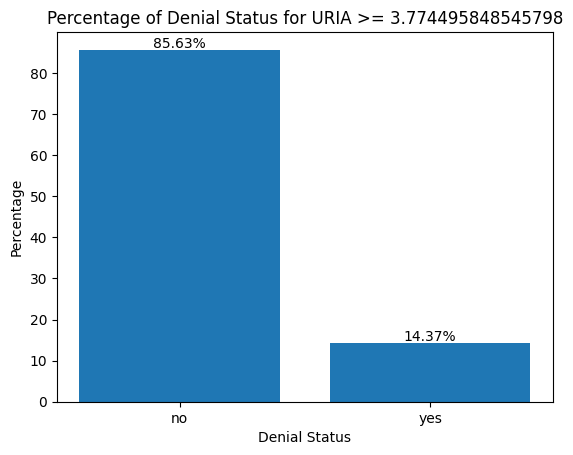

In [ ]:
# Filter data for URIA greater than or equal to 3.774495848545798
uria = hmda[hmda["uria"] >= 3.774495848545798]

# Get value counts of 'deny' column for URIA greater than or equal to 3.774495848545798
uria_deny_counts = uria["deny"].value_counts()

# Calculate percentages
deny_percentages = uria_deny_counts / uria_deny_counts.sum() * 100

# Plotting the graph
plt.bar(deny_percentages.index, deny_percentages.values)

# Adding percentage labels
for i, percentage in enumerate(deny_percentages):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

# Adding title and labels
plt.title("Percentage of Denial Status for URIA >= 3.774495848545798")
plt.xlabel("Denial Status")
plt.ylabel("Percentage")

# Display the plot
plt.show()


## 3.11 Based on whether or not one owns a condominium

1694 no, 686 yes

condo=no : 88.84% not denied mortgages, 11.2% denied mortgages

condo=yes : 86.01% not denied mortgages, 13.99% denied mortgages

In [ ]:
# creating a copy of the dataset
hmda1 = hmda.copy()

In [ ]:
# replacing the categorical values with numerical values
hmda1["comdominiom"] = hmda1['comdominiom'].replace({0 : 'no', 1: 'yes'})
hmda1

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,no,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,no,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,no,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,no,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,0.310,0.250,0.800000,1.0,1.0,no,no,yes,no,3.2,no,no,no
2376,0.300,0.300,0.777049,1.0,2.0,no,no,no,yes,3.2,yes,no,no
2377,0.260,0.200,0.526761,2.0,1.0,no,no,no,no,3.1,no,no,no
2378,0.320,0.260,0.753846,6.0,1.0,yes,no,no,yes,3.1,yes,yes,yes


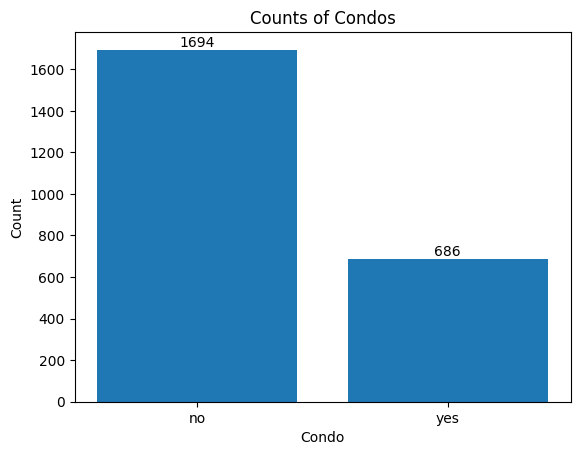

In [ ]:
# Assuming 'hmda1' is your DataFrame containing relevant data

# Extract unique elements of the "comdominiom" column
unique_condos = hmda1["comdominiom"].unique()

# Count occurrences of each unique condo type
condo_counts = hmda1["comdominiom"].value_counts()

# Plotting the bar plot
plt.bar(unique_condos, condo_counts)

# Adding labels and title
plt.xlabel('Condo')
plt.ylabel('Count')
plt.title('Counts of Condos')

# Adding count labels on top of each bar
for x, y in zip(unique_condos, condo_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Show plot
plt.show()


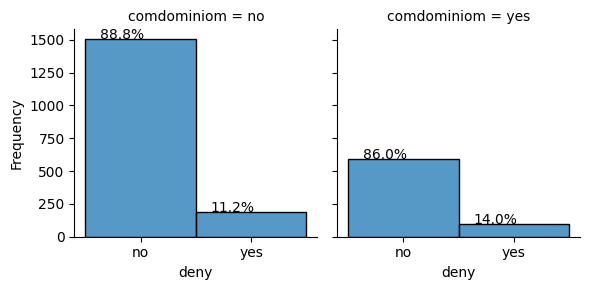

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define a function to annotate each histogram with percentages
def annotate_perc(x, **kwargs):
    total = len(x)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 3., height + 1.1, f'{height / total:.1%}', ha="center")

# Plotting the graph with more space between subplots
g = sns.FacetGrid(hmda1, col="comdominiom", col_wrap=2, height=3, aspect=1)
g.map_dataframe(sns.histplot, x="deny", stat="count")
g.set_axis_labels("Mortgage Deny Counts", "Frequency")

# Annotate the histograms with percentages
g.map(annotate_perc, "deny")

plt.show()


## 3.12 Based on color

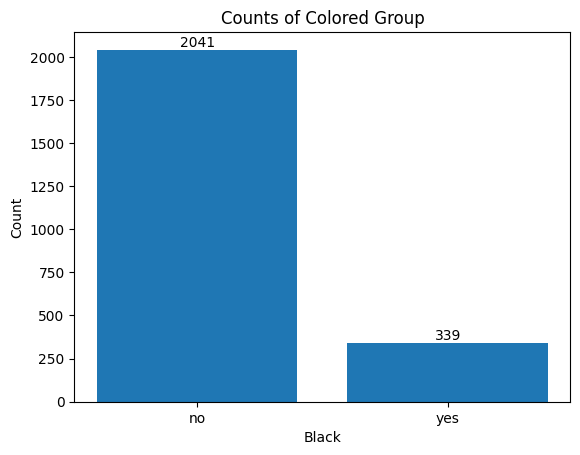

In [ ]:
# Assuming 'hmda1' is your DataFrame containing relevant data

# Extract unique elements of the "comdominiom" column
black = hmda1["black"].unique()

# Count occurrences of each unique condo type
black_counts = hmda["black"].value_counts()

# Plotting the bar plot
plt.bar(black, black_counts)

# Adding labels and title
plt.xlabel('Black')
plt.ylabel('Count')
plt.title('Counts of Colored Group')

# Adding count labels on top of each bar
for x, y in zip(black, black_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Show plot
plt.show()


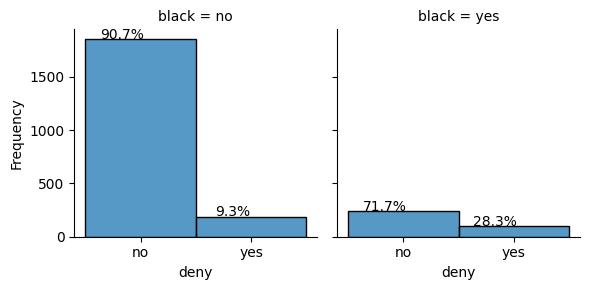

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define a function to annotate each histogram with percentages
def annotate_perc(x, **kwargs):
    total = len(x)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 3., height + 1.1, f'{height / total:.1%}', ha="center")

# Plotting the graph with more space between subplots
g = sns.FacetGrid(hmda, col="black", col_wrap=2, height=3, aspect=1)
g.map_dataframe(sns.histplot, x="deny", stat="count")
g.set_axis_labels("Mortgage Deny Counts", "Frequency")

# Annotate the histograms with percentages
g.map(annotate_perc, "deny")

plt.show()


# 4. Feature Selection

---


Average Features Importance:

dmi: 16.18%

lvr: 14.65%

dir: 12.44%

hir: 9.31%

ccs: 7.89%

pbcr: 4.65%

uria: 4.13%

black: 2.96%

mcs: 2.26%

single: 2.10%

self: 1.95%

comdominiom: 1.87%

## 4.1 Correlation Matrix

In [ ]:
# Create a copy of the DataFrame
hmda3 = hmda.copy()

# Define a dictionary to map 'yes' to 1 and 'no' to 0
replace_dict = {'yes': 1, 'no': 0}

# Replace 'yes' and 'no' with 1 and 0 respectively in categorical columns
categorical_columns = ['pbcr', 'dmi', 'self', 'single', 'comdominiom', 'black', 'deny']
hmda3[categorical_columns] = hmda3[categorical_columns].replace(replace_dict)

hmda3


,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,0,0,0,0,3.9,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,0,0,0,1,3.2,0,0,0
2,0.372,0.248,0.920398,1.0,2.0,0,0,0,0,3.2,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,0,0,0,0,4.3,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,0,0,0,0,3.2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,0.310,0.250,0.800000,1.0,1.0,0,0,1,0,3.2,0,0,0
2376,0.300,0.300,0.777049,1.0,2.0,0,0,0,1,3.2,1,0,0
2377,0.260,0.200,0.526761,2.0,1.0,0,0,0,0,3.1,0,0,0
2378,0.320,0.260,0.753846,6.0,1.0,1,0,0,1,3.1,1,1,1


Correlation Matrix:
                  dir       hir       lvr       ccs       mcs      pbcr  \
dir          1.000000  0.781473  0.150655  0.065234  0.051318  0.102300   
hir          0.781473  1.000000  0.126274  0.005277  0.104721  0.056445   
lvr          0.150655  0.126274  1.000000  0.111940  0.186327  0.100889   
ccs          0.065234  0.005277  0.111940  1.000000  0.152686  0.287531   
mcs          0.051318  0.104721  0.186327  0.152686  1.000000  0.056411   
pbcr         0.102300  0.056445  0.100889  0.287531  0.056411  1.000000   
dmi          0.044258  0.020147  0.120979  0.050964  0.046693  0.085551   
self         0.036141 -0.014239 -0.056662 -0.015913 -0.065171  0.028274   
single       0.031045  0.059828  0.045252  0.013969  0.166751  0.000582   
uria         0.046450  0.036992 -0.034643 -0.006424  0.037077  0.011171   
comdominiom -0.012452 -0.046043  0.054951  0.050747  0.090470  0.030419   
black        0.076677  0.046055  0.162076  0.221157  0.119910  0.161552   
deny 

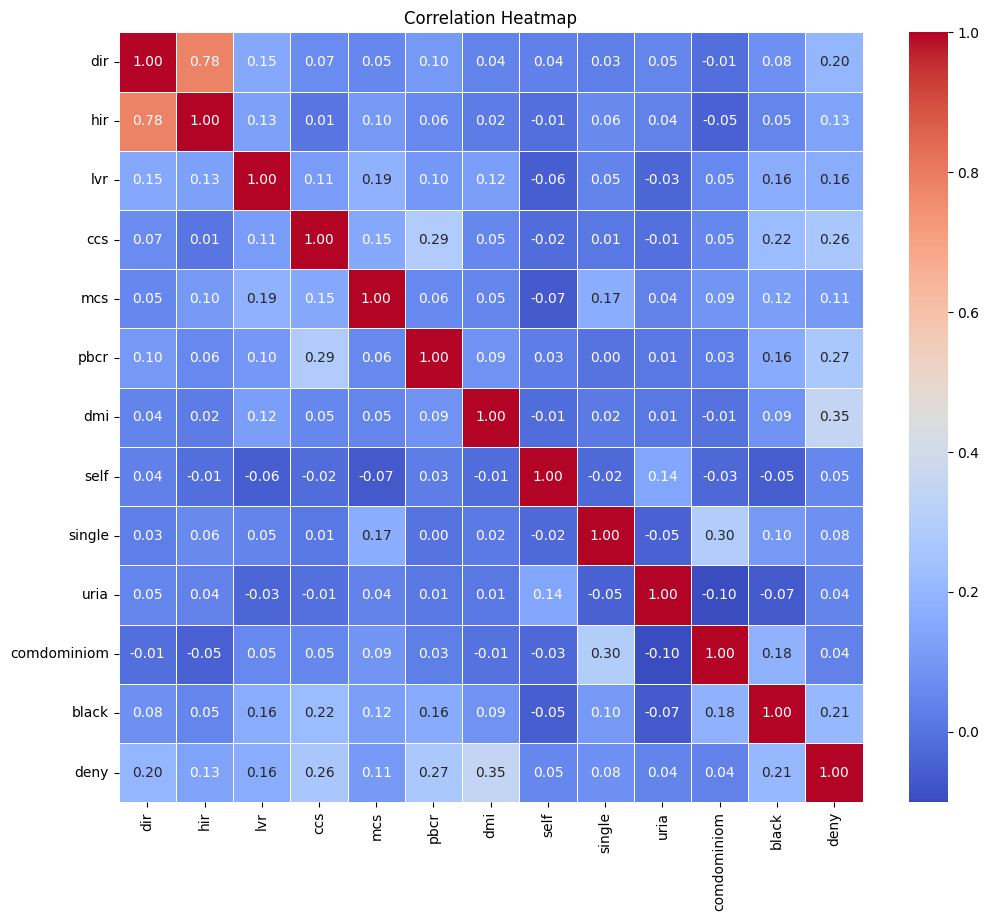


Features with Highest Correlation Scores to 'deny' (in ascending order):
dmi            0.352154
pbcr           0.272929
ccs            0.262369
black          0.205160
dir            0.199343
lvr            0.162223
hir            0.133076
mcs            0.109649
single         0.076609
self           0.051775
uria           0.043594
comdominiom    0.039581
Name: deny, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
correlation_matrix = hmda3.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# List features with highest correlation scores in ascending order
correlation_with_deny = correlation_matrix['deny'].sort_values(ascending=False)
highest_correlation_features = correlation_with_deny[correlation_with_deny.index != 'deny']  # Exclude self-correlation
print("\nFeatures with Highest Correlation Scores to 'deny' (in ascending order):")
print(highest_correlation_features)


Correlation Matrix:
                  dir       hir       lvr       ccs       mcs      pbcr  \
dir          1.000000  0.781473  0.150655  0.065234  0.051318  0.102300   
hir          0.781473  1.000000  0.126274  0.005277  0.104721  0.056445   
lvr          0.150655  0.126274  1.000000  0.111940  0.186327  0.100889   
ccs          0.065234  0.005277  0.111940  1.000000  0.152686  0.287531   
mcs          0.051318  0.104721  0.186327  0.152686  1.000000  0.056411   
pbcr         0.102300  0.056445  0.100889  0.287531  0.056411  1.000000   
dmi          0.044258  0.020147  0.120979  0.050964  0.046693  0.085551   
self         0.036141 -0.014239 -0.056662 -0.015913 -0.065171  0.028274   
single       0.031045  0.059828  0.045252  0.013969  0.166751  0.000582   
uria         0.046450  0.036992 -0.034643 -0.006424  0.037077  0.011171   
comdominiom -0.012452 -0.046043  0.054951  0.050747  0.090470  0.030419   
black        0.076677  0.046055  0.162076  0.221157  0.119910  0.161552   
deny 

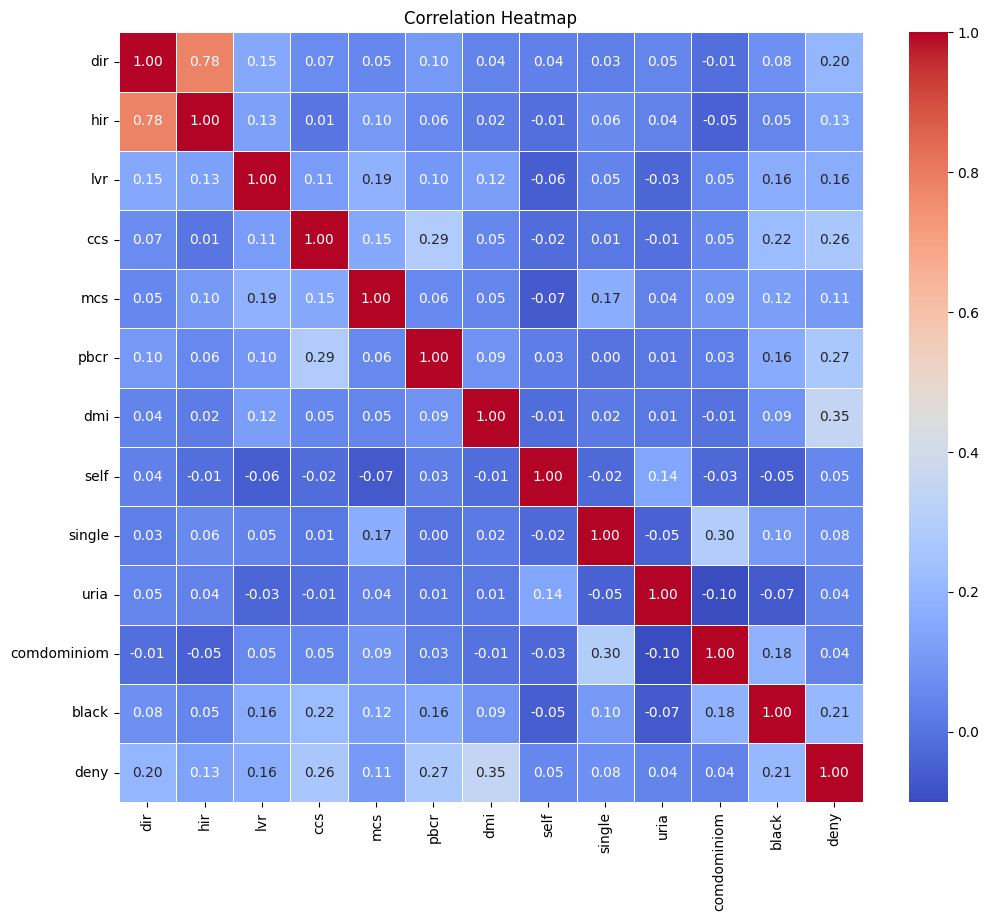


Features with Highest Correlation Scores to 'deny' (in ascending order):
dmi            18.452238
pbcr           14.300994
ccs            13.747640
black          10.750035
dir            10.445196
lvr             8.500176
hir             6.972951
mcs             5.745432
single          4.014161
self            2.712939
uria            2.284271
comdominiom     2.073967
Name: deny, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = hmda3.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Calculate feature importance as percentages
correlation_with_deny = correlation_matrix['deny'].sort_values(ascending=False)
highest_correlation_features = correlation_with_deny[correlation_with_deny.index != 'deny']  # Exclude self-correlation
highest_correlation_features_percentage = (highest_correlation_features / highest_correlation_features.sum()) * 100

# Print features with their importance as percentages
print("\nFeatures with Highest Correlation Scores to 'deny' (in ascending order):")
print(highest_correlation_features_percentage)


## 4.2 Decision tree Classifier

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = hmda3.drop(columns=['deny'])  # Features
y = hmda3['deny']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Calculate feature importances as percentages
total_importance = sum(feature_importances)
feature_importances_percent = [importance / total_importance * 100 for importance in feature_importances]

# Create a DataFrame to display feature importances as percentages
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance (%)': feature_importances_percent})
feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)

# Display the DataFrame
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
        Feature  Importance (%)
2           lvr       25.704849
0           dir       21.348425
1           hir       13.716303
6           dmi       12.802586
3           ccs        7.716603
9          uria        6.119961
11        black        2.523161
5          pbcr        2.503971
8        single        2.314341
7          self        2.243631
10  comdominiom        1.881746
4           mcs        1.124423


## 4.3 Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = hmda3.drop(columns=['deny'])  # Features
y = hmda3['deny']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Calculate feature importances as percentages
total_importance = sum(feature_importances)
feature_importances_percent = [importance / total_importance * 100 for importance in feature_importances]

# Create a DataFrame to display feature importances as percentages
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance (%)': feature_importances_percent})
feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)

# Display the DataFrame
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
        Feature  Importance (%)
2           lvr       20.905773
0           dir       18.643992
1           hir       16.236886
6           dmi        9.344031
3           ccs        8.795183
9          uria        8.064847
5          pbcr        4.729458
4           mcs        3.229056
11        black        3.219788
10  comdominiom        2.665649
8        single        2.547550
7          self        1.617788


## 4.4 Gradient Boosting Classifier

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the relevant data
# Separate features (X) and target variable (y)
X = hmda3.drop(columns=['deny'])  # Features
y = hmda3['deny']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting classifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Calculate feature importances as percentages
total_importance = sum(feature_importances)
feature_importances_percent = [importance / total_importance * 100 for importance in feature_importances]

# Create a DataFrame to display feature importances as percentages
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance (%)': feature_importances_percent})
feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)

# Display the DataFrame
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
        Feature  Importance (%)
6           dmi       24.010154
2           lvr       21.625713
0           dir       16.478415
3           ccs       12.567468
1           hir       12.019741
5          pbcr        5.400571
11        black        2.450559
9          uria        2.070419
4           mcs        1.479929
8        single        1.134311
10  comdominiom        0.619610
7          self        0.143109


## 4.5 XG Boost:

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the relevant data
# Separate features (X) and target variable (y)
X = hmda3.drop(columns=['deny'])  # Features
y = hmda3['deny']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost classifier
clf = XGBClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Calculate feature importances as percentages
total_importance = sum(feature_importances)
feature_importances_percent = [importance / total_importance * 100 for importance in feature_importances]

# Create a DataFrame to display feature importances as percentages
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance (%)': feature_importances_percent})
feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)

# Display the DataFrame
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
        Feature  Importance (%)
6           dmi       34.371598
5          pbcr       10.350645
3           ccs       10.114972
11        black        6.399146
7          self        5.671914
0           dir        5.529112
4           mcs        5.335260
2           lvr        4.831238
1           hir        4.447622
8        single        4.437290
9          uria        4.354635
10  comdominiom        4.156567


In [ ]:
from collections import defaultdict

# Define the sets of importance scores
sets_of_importance_scores = [
    {'dmi': 0.352154, 'pbcr': 0.272929, 'ccs': 0.262369, 'black': 0.205160, 'dir': 0.199343, 'lvr': 0.162223, 'hir': 0.133076, 'mcs': 0.109649, 'single': 0.076609, 'self': 0.051775, 'uria': 0.043594, 'comdominiom': 0.039581},
    {'lvr': 25.704849, 'dir': 21.348425, 'hir': 13.716303, 'dmi': 12.802586, 'ccs': 7.716603, 'uria': 6.119961, 'black': 2.523161, 'pbcr': 2.503971, 'single': 2.314341, 'self': 2.243631, 'comdominiom': 1.881746, 'mcs': 1.124423},
    {'lvr': 20.905773, 'dir': 18.643992, 'hir': 16.236886, 'dmi': 9.344031, 'ccs': 8.795183, 'uria': 8.064847, 'pbcr': 4.729458, 'mcs': 3.229056, 'black': 3.219788, 'comdominiom': 2.665649, 'single': 2.547550, 'self': 1.617788},
    {'dmi': 24.010154, 'lvr': 21.625713, 'dir': 16.478415, 'ccs': 12.567468, 'hir': 12.019741, 'pbcr': 5.400571, 'black': 2.450559, 'uria': 2.070419, 'mcs': 1.479929, 'single': 1.134311, 'comdominiom': 0.619610, 'self': 0.143109},
    {'dmi': 34.371598, 'pbcr': 10.350645, 'ccs': 10.114972, 'black': 6.399146, 'self': 5.671914, 'dir': 5.529112, 'mcs': 5.335260, 'lvr': 4.831238, 'hir': 4.447622, 'single': 4.437290, 'uria': 4.354635, 'comdominiom': 4.156567}
]

# Create a defaultdict to store the total importance scores for each feature
total_importance_scores = defaultdict(float)

# Count the number of sets
num_sets = len(sets_of_importance_scores)

# Update the total importance scores for each feature
for importance_scores in sets_of_importance_scores:
    for feature, importance in importance_scores.items():
        total_importance_scores[feature] += importance

# Calculate the average importance scores for each feature
average_importance_scores = {feature: total_importance / num_sets for feature, total_importance in total_importance_scores.items()}

# Sort the features based on the average importance scores
sorted_average_importance_scores = dict(sorted(average_importance_scores.items(), key=lambda item: item[1], reverse=True))

# Print the sorted average importance scores
print("Average Importance Scores:")
for feature, importance in sorted_average_importance_scores.items():
    print(f"{feature}: {importance:.2f}%")


Average Importance Scores:
dmi: 16.18%
lvr: 14.65%
dir: 12.44%
hir: 9.31%
ccs: 7.89%
pbcr: 4.65%
uria: 4.13%
black: 2.96%
mcs: 2.26%
single: 2.10%
self: 1.95%
comdominiom: 1.87%


# 5. Using machine learning models to train, test and evaluate the accuracy of predictions with and without the colored group.


Evaluation metrics used:

1. Accuracy:

Accuracy measures the proportion of correctly classified instances out of the total instances in the dataset.
It is calculated as the ratio of the number of correctly predicted instances to the total number of instances.

2. Precision:

Precision measures the proportion of true positive predictions out of all positive predictions made by the model. Precision is important in cases where false positives are costly or should be minimized. For example, in medical diagnosis, precision indicates the proportion of correctly identified positive cases out of all cases predicted as positive.

3. Recall(Sensitivity):

Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset.
It focuses on the model's ability to capture all positive instances.Recall is crucial in scenarios where missing positive instances (false negatives) are more detrimental than false positives.

4. F1 score:

The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.The F1-score ranges from 0 to 1, where higher values indicate better model performance.




5. ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):

ROC-AUC is a performance metric that evaluates the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) across various threshold values.
It measures the model's ability to distinguish between classes and is calculated as the area under the ROC curve.
A higher ROC-AUC score (closer to 1) indicates better model performance, with a perfect classifier achieving an ROC-AUC of 1.

---




## 5.1 Logistic regression:

Logistic regression is a statistical method used for binary classification tasks, where the outcome variable is categorical and has only two possible values, typically encoded as 0 and 1. It models the probability that a given input belongs to one of the two classes based on one or more predictor variables.

The logistic regression model applies the logistic function, also known as the sigmoid function, to the linear combination of the predictor variables. This transformation ensures that the output of the model is bounded between 0 and 1, representing the probability of the input belonging to the positive class.

The logistic regression algorithm estimates the coefficients of the predictor variables by maximizing the likelihood function or minimizing the logistic loss function. These coefficients represent the influence of each predictor variable on the probability of the positive outcome.

During prediction, logistic regression calculates the probability of the input belonging to the positive class using the learned coefficients and applies a threshold to make a binary decision.

In [ ]:
# Colored group included

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Separate features (X) and target variable (y)
X = hmda3.drop(columns=['deny'])  # Features
y = hmda3['deny']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model with increased max_iter
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Prediction Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate ROC-AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


Prediction Accuracy: 0.9159663865546218
Precision: 0.9047619047619048
Recall: 0.3333333333333333
F1 Score: 0.4871794871794871
ROC-AUC Score: 0.7980571954947033


In [ ]:
# Colored group excluded

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'df' is your DataFrame containing the relevant data
# Drop the 'black' column
df = hmda3.drop(columns=['black'])

# Separate features (X) and target variable (y)
X = df.drop(columns=['deny'])  # Features
y = df['deny']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model with increased max_iter
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Prediction Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate ROC-AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


Prediction Accuracy: 0.907563025210084
Precision: 0.8095238095238095
Recall: 0.2982456140350877
F1 Score: 0.43589743589743585
ROC-AUC Score: 0.7942888246870158


In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

# Results with 'black' column
accuracy_with_black = 0.9159663865546218
precision_with_black = 0.9047619047619048
recall_with_black = 0.3333333333333333
f1_score_with_black = 0.4871794871794871
roc_auc_with_black = 0.7980571954947033

# Results without 'black' column
accuracy_without_black = 0.907563025210084
precision_without_black = 0.8095238095238095
recall_without_black = 0.2982456140350877
f1_score_without_black = 0.43589743589743585
roc_auc_without_black = 0.7942888246870158

# Metrics names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

# Results with and without 'black' column
results_with_black = [accuracy_with_black, precision_with_black, recall_with_black, f1_score_with_black, roc_auc_with_black]
results_without_black = [accuracy_without_black, precision_without_black, recall_without_black, f1_score_without_black, roc_auc_without_black]

# Create DataFrame for easy plotting
results_df = pd.DataFrame({'Metrics': metrics,
                           'With Black Column': results_with_black,
                           'Without Black Column': results_without_black})

# Plotting
fig = go.Figure()

# Adding bar trace for each metric with 'With Black Column'
fig.add_trace(go.Bar(x=results_df['Metrics'], y=results_df['With Black Column'], name='With Black Column', marker_color='blue'))

# Adding bar trace for each metric with 'Without Black Column'
fig.add_trace(go.Bar(x=results_df['Metrics'], y=results_df['Without Black Column'], name='Without Black Column', marker_color='red'))

# Adding values as text on the bar plot
for i, metric in enumerate(metrics):
    fig.add_annotation(x=metric, y=results_df.loc[i, 'With Black Column'], text=f"{results_df.loc[i, 'With Black Column']:.3f}", showarrow=False, font=dict(color='blue'))
    fig.add_annotation(x=metric, y=results_df.loc[i, 'Without Black Column'], text=f"{results_df.loc[i, 'Without Black Column']:.3f}", showarrow=False, font=dict(color='red'))

# Updating layout
fig.update_layout(barmode='group', title='Comparison of Logistic Regression Metrics with and without Black Column', xaxis_title='Metrics', yaxis_title='Scores', xaxis_tickangle=-45, legend=dict(yanchor="bottom", y=0.99, xanchor="left", x=0.01), width=800, height=500)

# Show plot
pio.show(fig)


## 5.2 Decision Tree Classifier:


A decision tree classifier is a popular machine learning algorithm used for both classification and regression tasks. It operates by recursively partitioning the input space into smaller regions based on the feature values, effectively creating a tree-like structure where each internal node represents a decision based on a specific feature, and each leaf node corresponds to a class label or a predicted value.

At each node of the tree, the algorithm selects the feature that best splits the data into homogeneous subsets, aiming to maximize the purity or homogeneity of the resulting partitions. The purity of a partition is typically measured using metrics such as Gini impurity or entropy.

The decision-making process of a decision tree follows a top-down approach, where the algorithm iteratively selects the best feature to split the data until a stopping criterion is met, such as reaching a maximum tree depth, achieving a minimum number of samples per leaf node, or no further improvement in purity.

In [ ]:
# Colored group included

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'df' is your DataFrame containing the relevant data
# Separate features (X) and target variable (y)
X = hmda3.drop(columns=['deny'])  # Features
y = hmda3['deny']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Prediction Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate ROC-AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


Prediction Accuracy: 0.8487394957983193
Precision: 0.3584905660377358
Recall: 0.3333333333333333
F1 Score: 0.34545454545454546
ROC-AUC Score: 0.6260938743038981


In [ ]:
# Colored group excluded

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'df' is your DataFrame containing the relevant data
# Drop the 'black' column
df = hmda3.drop(columns=['black'])

# Separate features (X) and target variable (y)
X = df.drop(columns=['deny'])  # Features
y = df['deny']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Prediction Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate ROC-AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


Prediction Accuracy: 0.8550420168067226
Precision: 0.39285714285714285
Recall: 0.38596491228070173
F1 Score: 0.38938053097345127
ROC-AUC Score: 0.6524096637775822


In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

# Results with 'black' column
accuracy_with_black = 0.8487394957983193
precision_with_black = 0.3584905660377358
recall_with_black = 0.3333333333333333
f1_score_with_black = 0.34545454545454546
roc_auc_with_black = 0.6260938743038981

# Results without 'black' column
accuracy_without_black = 0.8550420168067226
precision_without_black = 0.39285714285714285
recall_without_black = 0.38596491228070173
f1_score_without_black = 0.38938053097345127
roc_auc_without_black = 0.6524096637775822

# Metrics names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

# Results with and without 'black' column
results_with_black = [accuracy_with_black, precision_with_black, recall_with_black, f1_score_with_black, roc_auc_with_black]
results_without_black = [accuracy_without_black, precision_without_black, recall_without_black, f1_score_without_black, roc_auc_without_black]

# Create DataFrame for easy plotting
results_df = pd.DataFrame({'Metrics': metrics,
                           'With Black Column': results_with_black,
                           'Without Black Column': results_without_black})

# Plotting
fig = go.Figure()

# Adding bar trace for each metric with 'With Black Column'
fig.add_trace(go.Bar(x=results_df['Metrics'], y=results_df['With Black Column'], name='With Black Column', marker_color='blue'))

# Adding bar trace for each metric with 'Without Black Column'
fig.add_trace(go.Bar(x=results_df['Metrics'], y=results_df['Without Black Column'], name='Without Black Column', marker_color='red'))

# Adding actual values as text on the bar plot
for i, metric in enumerate(metrics):
    fig.add_annotation(x=metric, y=results_df.loc[i, 'With Black Column'], text=f"{results_df.loc[i, 'With Black Column']:.3f}", showarrow=False, font=dict(color='blue'))
    fig.add_annotation(x=metric, y=results_df.loc[i, 'Without Black Column'], text=f"{results_df.loc[i, 'Without Black Column']:.3f}", showarrow=False, font=dict(color='red'))

# Updating layout
fig.update_layout(barmode='group', title='Comparison of Decision Tree Metrics with and without Black Column', xaxis_title='Metrics', yaxis_title='Scores', xaxis_tickangle=-45, legend=dict(yanchor="bottom", y=0.99, xanchor="left", x=0.01), width=800, height=500)

# Show plot
pio.show(fig)


## 5.3 Random Forest Classifier:

Random Forest classifier is an ensemble learning method used in machine learning for classification tasks. It constructs a multitude of decision trees during training and outputs the mode of the classes predicted by individual trees as the final classification. The strength of Random Forest lies in its ability to mitigate overfitting, handle high-dimensional data, and produce robust predictions.

The algorithm's name stems from the concept of randomness injected into the training process. It employs two sources of randomness: bootstrap aggregating (bagging) and random feature selection. Bagging involves randomly selecting subsets of the training data with replacement to train each decision tree. Random feature selection ensures that only a subset of features is considered at each split point in the tree-building process.

By building multiple decision trees with different subsets of data and features, Random Forests effectively reduce variance and increase prediction accuracy. They are resistant to overfitting and noise, making them suitable for diverse datasets. Moreover, Random Forests provide insights into feature importance, aiding in feature selection and interpretation.


In [ ]:
# Colored group included

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Separate features (X) and target variable (y)
X = hmda3.drop(columns=['deny'])  # Features
y = hmda3['deny']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Prediction Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate ROC-AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


Prediction Accuracy: 0.9012605042016807
Precision: 0.75
Recall: 0.2631578947368421
F1 Score: 0.38961038961038963
ROC-AUC Score: 0.8473181761085291


In [ ]:
# Colored group excluded

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'df' is your DataFrame containing the relevant data
# Drop the 'black' column
df = hmda3.drop(columns=['black'])

# Separate features (X) and target variable (y)
X = df.drop(columns=['deny'])  # Features
y = df['deny']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Prediction Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate ROC-AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


Prediction Accuracy: 0.8928571428571429
Precision: 0.65
Recall: 0.22807017543859648
F1 Score: 0.33766233766233766
ROC-AUC Score: 0.8320562743373948


In [ ]:
import pandas as pd
import plotly.graph_objs as go

# Results with 'black' column
accuracy_with_black = 0.9012605042016807
precision_with_black = 0.75
recall_with_black = 0.2631578947368421
f1_score_with_black = 0.38961038961038963
roc_auc_with_black = 0.8473181761085291

# Results without 'black' column
accuracy_without_black = 0.8928571428571429
precision_without_black = 0.65
recall_without_black = 0.22807017543859648
f1_score_without_black = 0.33766233766233766
roc_auc_without_black = 0.8320562743373948

# Metrics names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

# Results with and without 'black' column
results_with_black = [accuracy_with_black, precision_with_black, recall_with_black, f1_score_with_black, roc_auc_with_black]
results_without_black = [accuracy_without_black, precision_without_black, recall_without_black, f1_score_without_black, roc_auc_without_black]

# Create DataFrame for easy plotting
results_df = pd.DataFrame({'Metrics': metrics,
                           'With Black Column': results_with_black,
                           'Without Black Column': results_without_black})

# Plotting
fig = go.Figure()

# Adding bar trace for each metric with 'With Black Column'
fig.add_trace(go.Bar(x=results_df['Metrics'], y=results_df['With Black Column'], name='With Black Column', marker_color='blue'))

# Adding bar trace for each metric with 'Without Black Column'
fig.add_trace(go.Bar(x=results_df['Metrics'], y=results_df['Without Black Column'], name='Without Black Column', marker_color='red'))

# Adding actual values as text on the bar plot
for i, metric in enumerate(metrics):
    fig.add_annotation(x=metric, y=results_df.loc[i, 'With Black Column'], text=f"{results_df.loc[i, 'With Black Column']:.3f}", showarrow=False, font=dict(color='blue', size=12))
    fig.add_annotation(x=metric, y=results_df.loc[i, 'Without Black Column'], text=f"{results_df.loc[i, 'Without Black Column']:.3f}", showarrow=False, font=dict(color='red', size=12))

# Updating layout
fig.update_layout(barmode='group', title='Comparison of Random Forest Metrics with and without Black Column', xaxis_title='Metrics', yaxis_title='Scores', xaxis_tickangle=-45, legend=dict(yanchor="bottom", y=0.99, xanchor="left", x=0.01), width=800, height=500)

# Show plot
fig.show()


# 6. Interpretation:

The exclusion of colored group doesn't significantly affect the accuracy in the 3 machine learning models implemented.